In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
from spafe.features.gfcc import gfcc
from spafe.utils.preprocessing import SlidingWindow

In [2]:
def get_loggfcc(audio_path):
    waveform, sample_rate = librosa.load(audio_path)
    S = gfcc(sig = waveform,fs = sample_rate,num_ceps=224,window=SlidingWindow( 0.0892, 0.0892, "hamming"),nfilts = 401)
    S_dB = librosa.power_to_db(S.T, ref = np.max)
    delta_1 = librosa.feature.delta(S_dB, order=1)
    delta_2 = librosa.feature.delta(S_dB, order=2)

    arrs = np.array([S_dB,delta_1, delta_2])
    arrs = arrs.transpose(1,2,0)

    return arrs

In [3]:
get_loggfcc('../dementia-audio-classify/adrso_005_2_cn.wav').shape

(224, 224, 3)

In [4]:
dir = '../dementia-audio-classify/'
patients = os.listdir(dir)
print(len(patients))

labels = []
mels = []

for name in tqdm(patients):
    label = int(name.split('.')[0].split('_')[-1] == 'ad')
    labels.append(label)

    audio_path = dir + name
    log_mel = get_loggfcc(audio_path)
    mels.append(log_mel)


mels_new = np.array(mels)
labels_new = np.array(labels)

print(mels_new.shape)

486


  0%|          | 0/486 [00:00<?, ?it/s]

(486, 224, 224, 3)


### **RGB type log-mels we have**

  0%|          | 0/486 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

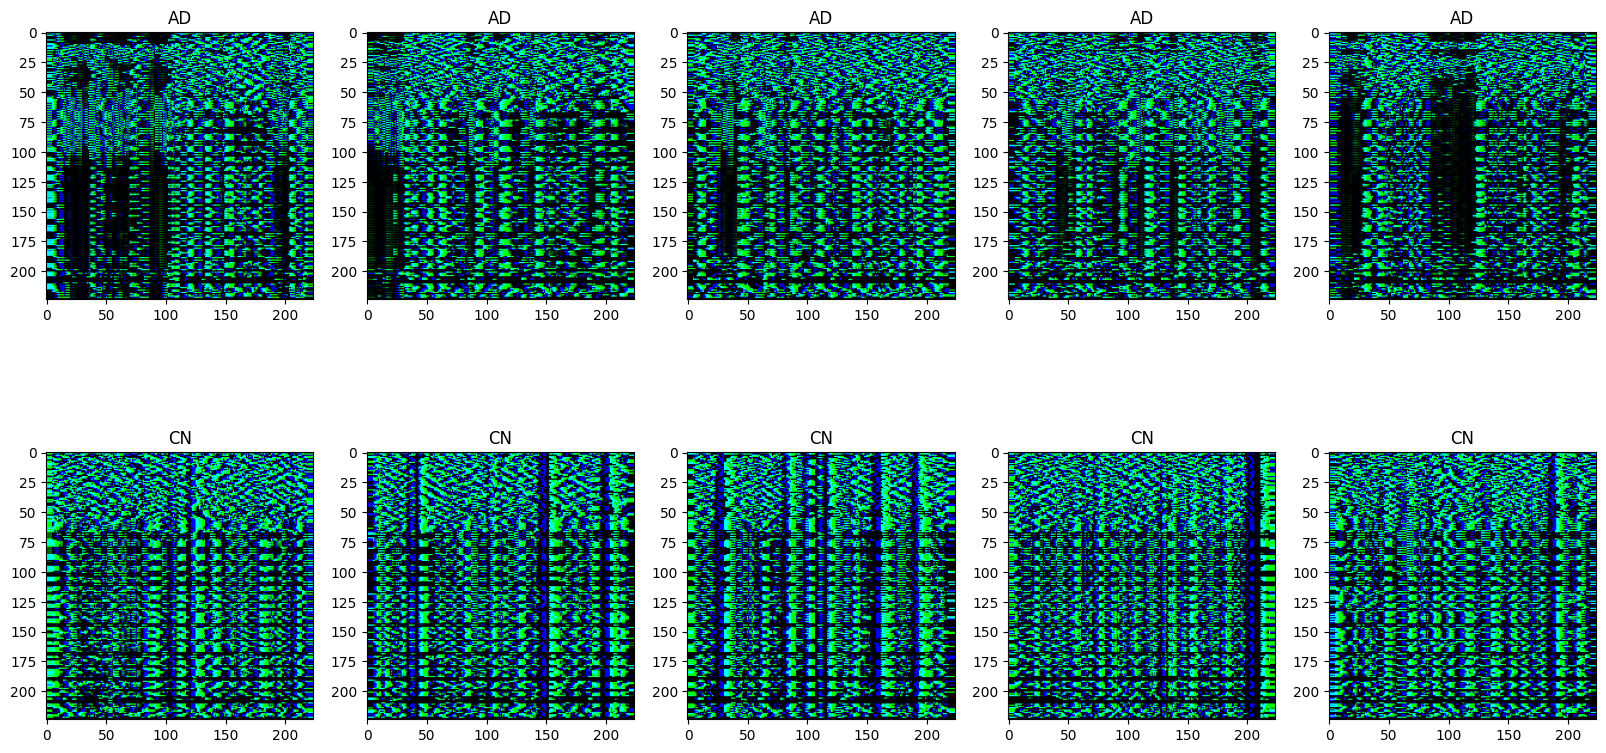

In [5]:
fig, axs = plt.subplots(2,5,figsize=(20,10))

cn_arr = []
ad_arr = []

for i in tqdm(range(486)):
    if labels_new[i]==1:
        ad_arr.append(i)
    elif labels_new[i]==0:
        cn_arr.append(i)

for i,indx in zip(range(5),ad_arr):
    axs[0,i].imshow(mels_new[indx])
    axs[0,i].set_title('AD')
for i,indx in zip(range(5),cn_arr):
    axs[1,i].imshow(mels_new[indx])
    axs[1,i].set_title('CN')

plt.show()

### **Lets build a customized EfficientNet**

In [6]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
import tensorflow as tf

In [7]:
def create_model():
    inputs = Input(shape = (224,224,3))
    model = EfficientNetB0( include_top = False, weights = "imagenet", input_shape = (224,223,3), input_tensor = inputs)

    # freeze weights
    model.trainable = False

    # rebuild top
    x = layers.GlobalAveragePooling2D(name = 'avg_pool')(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout( top_dropout_rate, name = 'top_dropout')(x)

    num_classes = 2
    outputs = layers.Dense( num_classes, activation = 'softmax', name = 'Pred_layer')(x)

    # compile
    model = tf.keras.Model( inputs, outputs, name = 'Customized_EfficientNet' )
    return model

# model = create_model()
# optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2)
# loss = tf.keras.losses.binary_crossentropy
# model.compile(
#     optimizer = optimizer,
#     loss = loss, 
#     metrics = ['accuracy']
# )

In [8]:
# model.summary()

In [9]:
# tf.keras.utils.plot_model(model)

In [10]:
labels_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### **Lets train model on the dataset**

In [1]:
# before training, encode labels and split data
labels_encoded = tf.keras.utils.to_categorical(labels_new, num_classes = 2, dtype = 'int')
labels_encoded

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(mels_new, labels_new, test_size = 0.1, random_state = 100, shuffle = True, stratify = labels_new)
print(f"X_train.shape = {X_train.shape}\nY_train.shape = {Y_train.shape}\nX_test.shape = {X_test.shape}\nY_test.shape = {Y_test.shape}\n")

X_train.shape = (437, 224, 224, 3)
Y_train.shape = (437,)
X_test.shape = (49, 224, 224, 3)
Y_test.shape = (49,)



In [13]:
# cross validation with 5 splits
from sklearn.model_selection import StratifiedKFold
import pickle
skf = StratifiedKFold(n_splits=5)

val_metrics = []
test_metrics = []
hists = []
conf_matxes = []

Y_test_encoded = tf.keras.utils.to_categorical(Y_test, num_classes = 2, dtype = 'int')

for i, (train_indx, val_indx) in enumerate(skf.split(X_train,Y_train)):
    print(f"Fold - {i}")

    # Create data - train and validation data - for this split
    X_train_crossval = []
    Y_train_crossval = []
    X_val_crossval = []
    Y_val_crossval = []
    
    # make train and validation data
    for indx in train_indx:
        X_train_crossval.append(X_train[indx])
        Y_train_crossval.append(Y_train[indx])
    for indx in val_indx:
        X_val_crossval.append(X_train[indx])
        Y_val_crossval.append(Y_train[indx])
    
    
    X_train_crossval = np.array(X_train_crossval)
    Y_train_crossval = tf.keras.utils.to_categorical(Y_train_crossval, num_classes = 2, dtype = 'int')

    X_val_crossval = np.array(X_val_crossval)
    Y_val_crossval = tf.keras.utils.to_categorical(Y_val_crossval, num_classes = 2, dtype = 'int')



    print(f'\n\n########    data ready-{i}    #############')
    
    
    # Create Model - train on the data
    model = create_model()
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 1e-2)
    loss = tf.keras.losses.binary_crossentropy
    model.compile(
    optimizer = optimizer, loss = loss, metrics = ["accuracy"]
    )

    epochs = 60
    hist = model.fit(x = X_train_crossval, y = Y_train_crossval, epochs = epochs, validation_data = (X_val_crossval, Y_val_crossval), shuffle = True,verbose=2)
    hists.append(hist)
    name = 'model_adamax_' + str(i) + '_Hist'

    # save history
    with open(name,'wb') as file_pi:
        pickle.dump(hist.history, file_pi)

    # save mode
    model.save(name + '.h5')

    # evaluate with validation data
    results = model.evaluate(X_val_crossval,Y_val_crossval)
    val_metrics.append(results)
    print(f"Val metrics = {results}")

    # test on test data - predictions
    preds = model.predict(X_test)  

    new_preds = []
    for pred in preds:
        if pred[0] > pred[1]:
            new_preds.append(0)     # coz cn has 0 -> [1,0] is encoded label
        elif pred[0] <= pred[1]:
            new_preds.append(1)
    
    # conf_matx
    conf_matx = tf.math.confusion_matrix(Y_test, new_preds, name = 'conf_matxx')
    conf_matxes.append(conf_matx)
    print(f"conf matx - {conf_matx}")

    # evaluate in test data
    metrics = model.evaluate(x = X_test, y = Y_test_encoded)
    test_metrics.append(metrics)
    print(f"Test metrics = {metrics}")


    

Fold - 0


########    data ready-0    #############
Epoch 1/60
11/11 - 10s - loss: 0.8491 - accuracy: 0.6418 - val_loss: 0.6657 - val_accuracy: 0.5795 - 10s/epoch - 880ms/step
Epoch 2/60
11/11 - 5s - loss: 0.6628 - accuracy: 0.6791 - val_loss: 0.6798 - val_accuracy: 0.5795 - 5s/epoch - 489ms/step
Epoch 3/60
11/11 - 5s - loss: 0.6290 - accuracy: 0.6905 - val_loss: 0.6624 - val_accuracy: 0.5795 - 5s/epoch - 500ms/step
Epoch 4/60
11/11 - 5s - loss: 0.6358 - accuracy: 0.6877 - val_loss: 0.6694 - val_accuracy: 0.5795 - 5s/epoch - 498ms/step
Epoch 5/60
11/11 - 5s - loss: 0.5793 - accuracy: 0.6991 - val_loss: 0.6565 - val_accuracy: 0.5795 - 5s/epoch - 491ms/step
Epoch 6/60
11/11 - 5s - loss: 0.5895 - accuracy: 0.7249 - val_loss: 0.6620 - val_accuracy: 0.6136 - 5s/epoch - 491ms/step
Epoch 7/60
11/11 - 5s - loss: 0.5571 - accuracy: 0.7163 - val_loss: 0.6597 - val_accuracy: 0.5909 - 5s/epoch - 490ms/step
Epoch 8/60
11/11 - 5s - loss: 0.5423 - accuracy: 0.7393 - val_loss: 0.6508 - val_accuracy: 

c:\Users\IIITDM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 1s 354ms/step - loss: 0.7149 - accuracy: 0.6250
Val metrics = [0.7148846983909607, 0.625]
2/2 [==============================] - 1s 261ms/step
conf matx - [[11  9]
 [ 5 24]]
2/2 [==============================] - 1s 239ms/step - loss: 0.5605 - accuracy: 0.7143
Test metrics = [0.5604570508003235, 0.7142857313156128]
Fold - 1


########    data ready-1    #############
Epoch 1/60
11/11 - 10s - loss: 0.9050 - accuracy: 0.5759 - val_loss: 0.6646 - val_accuracy: 0.5682 - 10s/epoch - 890ms/step
Epoch 2/60
11/11 - 6s - loss: 0.6979 - accuracy: 0.6562 - val_loss: 0.6646 - val_accuracy: 0.5795 - 6s/epoch - 546ms/step
Epoch 3/60
11/11 - 6s - loss: 0.6061 - accuracy: 0.7106 - val_loss: 0.6519 - val_accuracy: 0.6250 - 6s/epoch - 544ms/step
Epoch 4/60
11/11 - 6s - loss: 0.6472 - accuracy: 0.6819 - val_loss: 0.6523 - val_accuracy: 0.5909 - 6s/epoch - 544ms/step
Epoch 5/60
11/11 - 6s - loss: 0.6191 - accuracy: 0.6905 - val_loss: 0.6485 - val_accuracy: 0.6591 - 6

In [14]:
for i,(matx,metrics) in enumerate(zip(conf_matxes,test_metrics)):
    print(f"Fold - {i}")
    print(f"Conf matx - \n{matx}")
    print(f"Test acc - {metrics}")
    

Fold - 0
Conf matx - 
[[11  9]
 [ 5 24]]
Test acc - [0.5604570508003235, 0.7142857313156128]
Fold - 1
Conf matx - 
[[10 10]
 [ 4 25]]
Test acc - [0.54437655210495, 0.7142857313156128]
Fold - 2
Conf matx - 
[[ 9 11]
 [ 5 24]]
Test acc - [0.6641262769699097, 0.6734693646430969]
Fold - 3
Conf matx - 
[[13  7]
 [ 3 26]]
Test acc - [0.5565766096115112, 0.795918345451355]
Fold - 4
Conf matx - 
[[10 10]
 [ 2 27]]
Test acc - [0.643404483795166, 0.7551020383834839]
